In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, recall_score,precision_score,cohen_kappa_score
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
import pprint

In [2]:
df_fake = pd.read_csv('generated/results_get_fake_built.csv')
df_real = pd.read_csv('generated/results_get_real_built.csv')

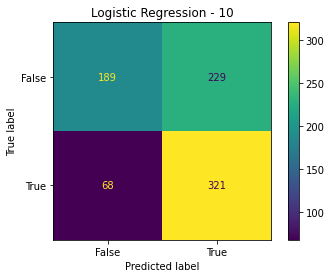

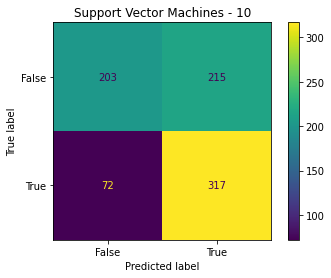

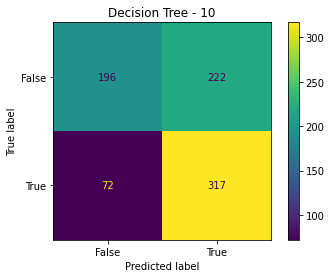

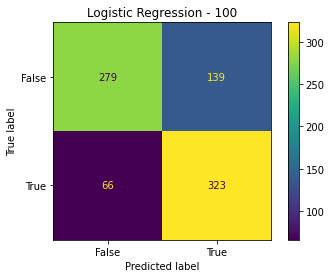

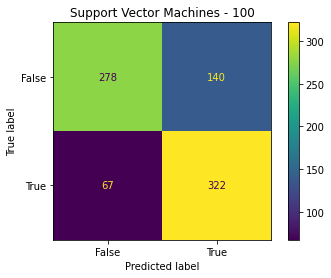

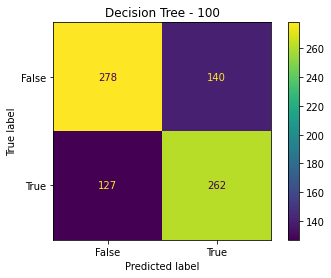

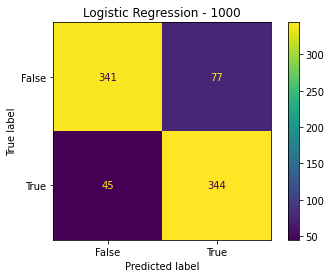

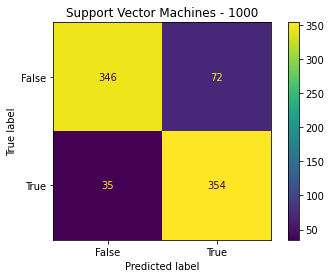

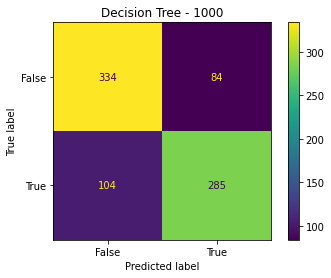

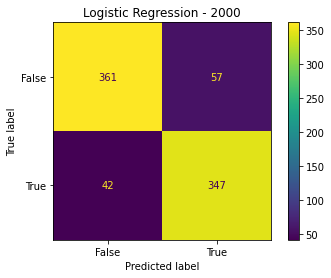

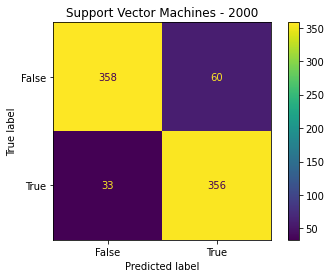

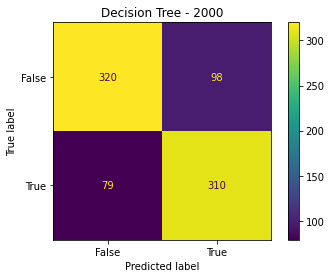

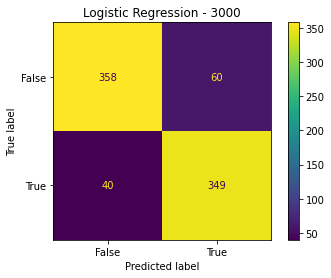

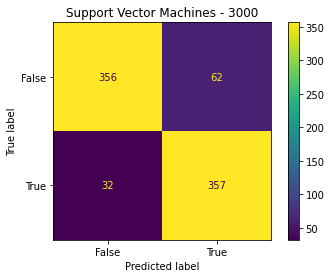

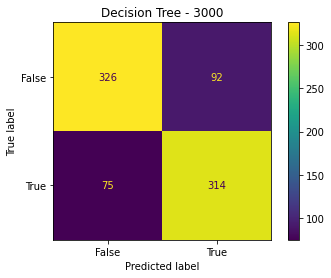

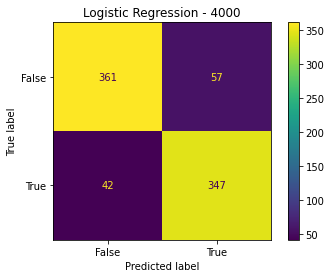

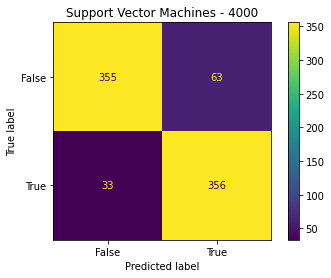

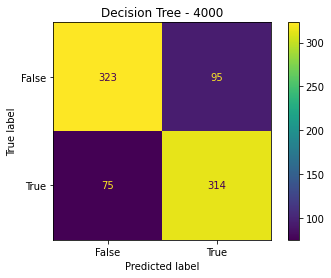

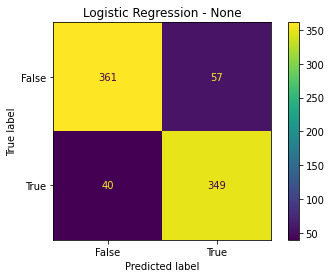

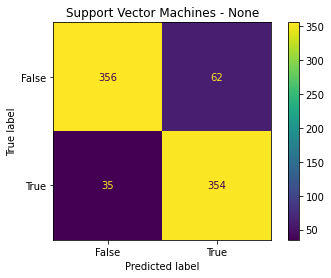

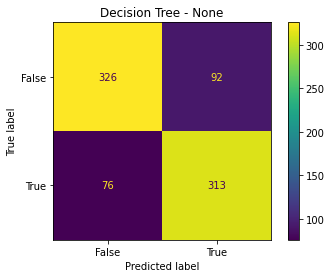

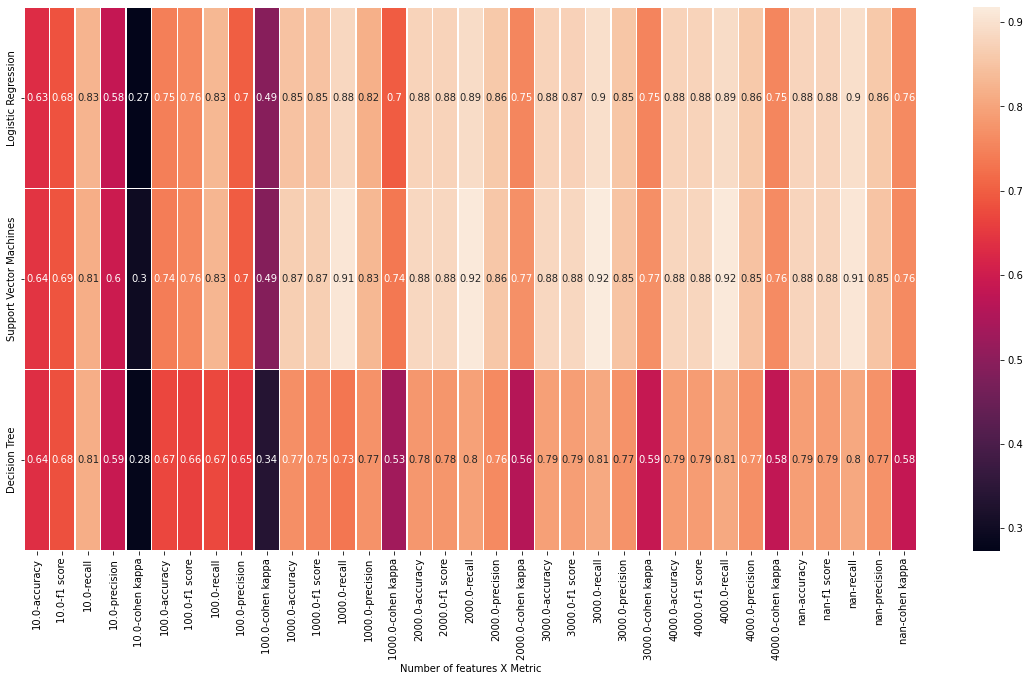

In [11]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Support Vector Machines': SVC(random_state = 42),
    'Decision Tree': DecisionTreeClassifier(random_state = 42)
}

accuracy_list = {}
f1_score_list = {}
recall_list = {}
precision_list = {}
cohen_kappa_list = {}
max_features_tested = [10, 100, 1000, 2000, 3000, 4000, None]
results = {}

for max_features in max_features_tested:
    results[max_features] = {}
    results[max_features]['accuracy'] = {}
    results[max_features]['f1 score'] = {}
    results[max_features]['recall'] = {}
    results[max_features]['precision'] = {}
    results[max_features]['cohen kappa'] = {}

    cv = CountVectorizer(max_features=max_features)
    X = cv.fit_transform(np.append(df_fake['1'], df_real['1'], axis=0)).toarray()
    y = np.append(df_fake['0'], df_real['0'], axis=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

    for key, model in classifiers.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        results[max_features]['recall'][key] = recall_score(y_test,y_pred)
        results[max_features]['precision'][key] = precision_score(y_test,y_pred)
        results[max_features]['accuracy'][key] = accuracy_score(y_test,y_pred)
        results[max_features]['f1 score'][key] = f1_score(y_test,y_pred)
        results[max_features]['cohen kappa'][key] = cohen_kappa_score(y_test,y_pred)

        plot_confusion_matrix(model, X_test, y_test)  
        plt.title(key + ' - ' + str(max_features))
        plt.show()

reformed_dict = {}
for outerKey, innerDict in results.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey, innerKey)] = values
  
multiIndex_df = pd.DataFrame(reformed_dict)
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(multiIndex_df, annot=True, linewidths=.5, ax=ax)
plt.xlabel("Number of features X Metric") 
plt.show()
